In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 250)

In [193]:
df = pd.read_pickle('data/car.pickle')

In [194]:
df.shape

(201381, 104)

In [195]:
df['Cena'] = df['Cena'].map(lambda x: str(x).replace(',','.')).astype(float)

In [196]:
up = np.percentile(df['Cena'], 99.99)

In [197]:
df = df[df['Cena'] < up]

In [ ]:
def change_price(x):
    Euro = 4.48
    if x['Waluta'] == 'EUR':
        x['Waluta'] = 'PLN'
        x['Cena'] *= Euro
    return x

df.apply(lambda x: change_price(x), axis = 1)

# EDA

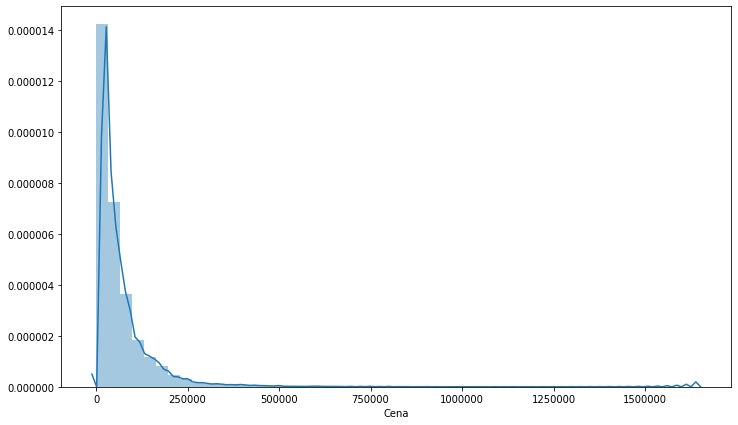

In [29]:
plt.figure(figsize=(12,7))
plt.ticklabel_format(useOffset=False, style='plain')
sns.distplot(df['Cena']);

In [30]:
def group_and_barplot(feat_groupby, feat_agg = 'Cena', agg_funcs = [np.mean, np.median, np.size], feat_sort = 'mean', top = 50, subplots = True):
    return (
        df
        .groupby(feat_groupby)[feat_agg]
        .agg(agg_funcs)
        .sort_values(by = feat_sort, ascending = False)
        .head(top)
    ).plot(kind = 'bar', figsize = (15,  10), subplots = subplots )

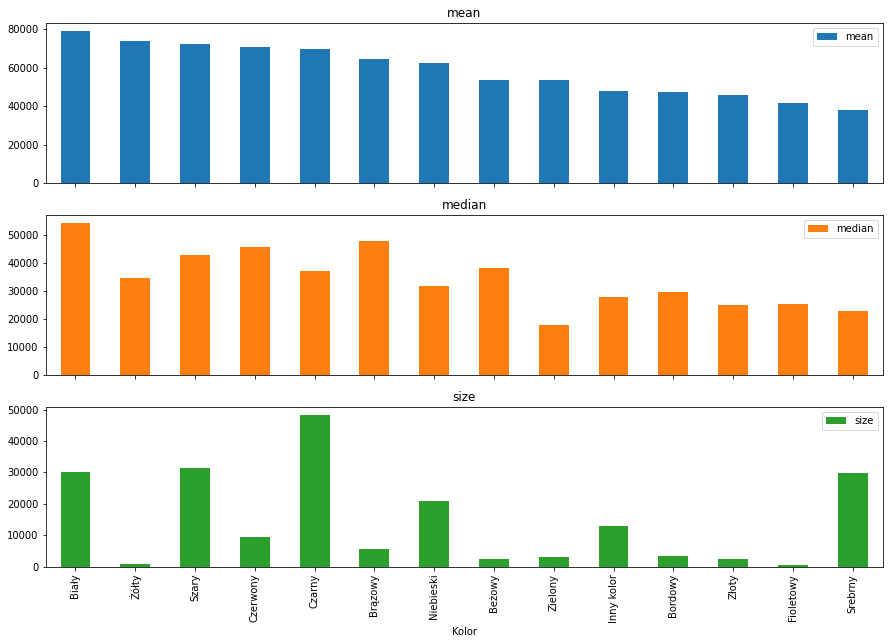

In [31]:
group_and_barplot('Kolor', feat_sort = 'mean');

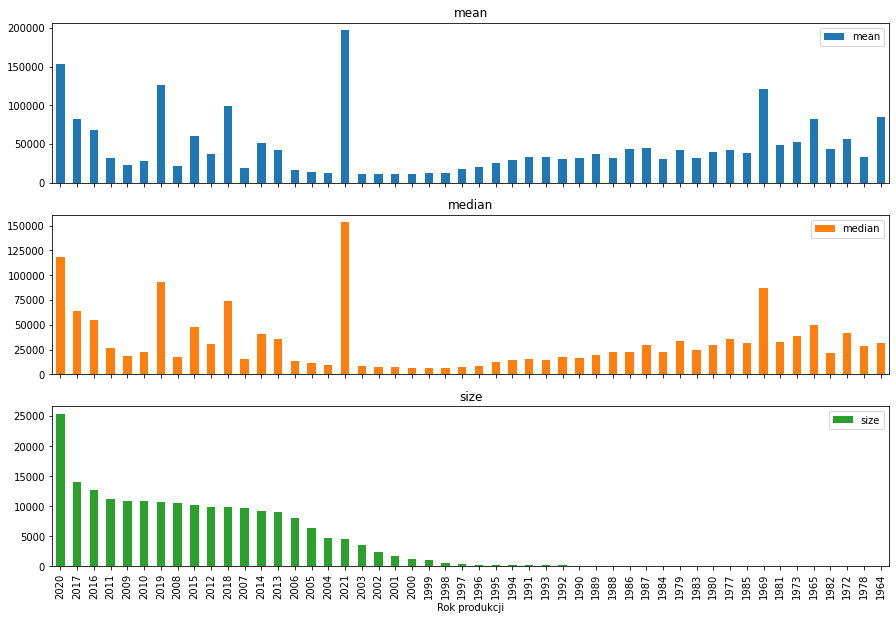

In [32]:
group_and_barplot('Rok produkcji', feat_sort = 'size');

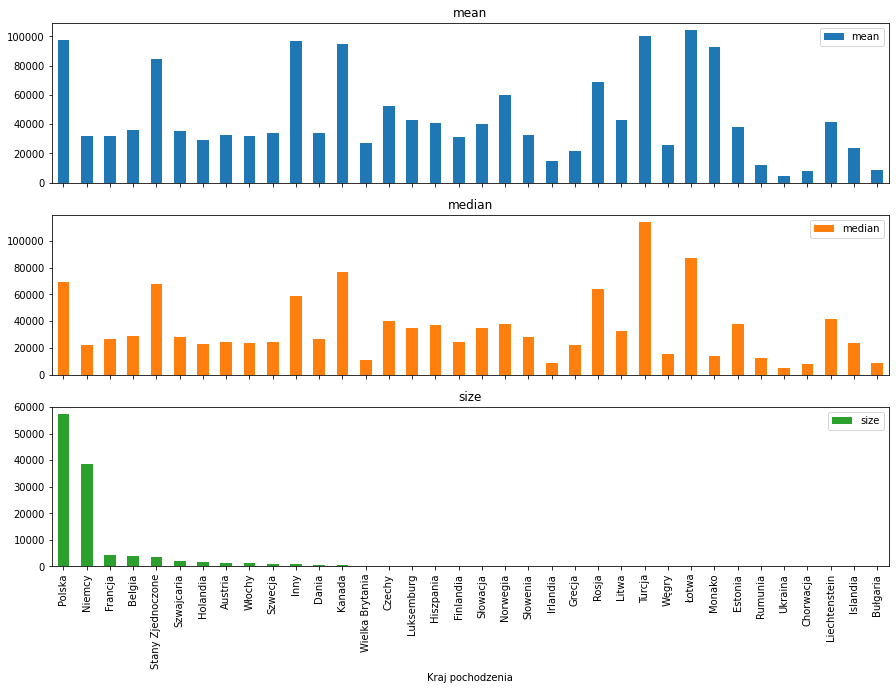

In [33]:
group_and_barplot('Kraj pochodzenia', feat_sort = 'size');

# Feature engineering

In [199]:
df[df.columns.values[30:-4]] = df[df.columns.values[30:-4]].fillna(0).astype(int)

In [200]:
for feat in df.columns:
    cnt = df[feat].isnull().sum()
    if cnt > 0:
        print(feat, cnt)

Wersja 71642
Generacja 57762
Przebieg 1225
Pojemność skokowa 2149
Moc 1410
Skrzynia biegów 1116
Napęd 15140
Emisja CO2 118699
Liczba drzwi 3122
Liczba miejsc 13302
Metalik 74433
Kierownica po prawej (Anglik) 200848
Kraj pochodzenia 83167
Leasing 167946
VAT marża 138069
Możliwość finansowania 113945
Pierwsza rejestracja 130097
Zarejestrowany w Polsce 107152
Pierwszy właściciel 132884
Bezwypadkowy 85513
Serwisowany w ASO 106690
Szczegóły ceny 57325
Opis 4673


In [201]:
df['Wersja'] = df['Wersja'].map(lambda x: x if x == x else 'Brak Danych')
df['Generacja'] = df['Generacja'].map(lambda x: x if x == x else 'Brak Danych')
df['Przebieg'] = df['Przebieg'].map(lambda x: int(''.join(str(x).split()[:-1])) if x == x else -1)
df['Pojemność skokowa'] = df['Pojemność skokowa'].map(lambda x: int(''.join(str(x).split()[:-1])) if x == x else -1)
df['Moc'] = df['Moc'].map(lambda x: int(str(x).split()[0]) if x == x else -1)
df['Skrzynia biegów'] = df['Skrzynia biegów'].map(lambda x: x if x == x else 'Brak Danych')
df['Napęd'] = df['Napęd'].map(lambda x: x if x == x else 'Brak Danych')
df['Emisja CO2'] = df['Emisja CO2'].map(lambda x: int(''.join(x.split()[:-1])) if x == x else -1)
df['Liczba drzwi'] = df['Liczba drzwi'].map(lambda x: int(x) if (x < 7 and x > 1)  else 5)
df['Liczba miejsc'] = df['Liczba miejsc'].map(lambda x: int(x) if x == x else 5)
df['Metalik'] = df['Metalik'].map(lambda x: 1 if x == 'Tak' or x == '2' or x == 'metallic' else 0)
df['Kierownica po prawej (Anglik)'] = df['Kierownica po prawej (Anglik)'].map(lambda x: 1 if x == 'Tak' or x == 'true' else 0)
df['Kraj pochodzenia'] = df['Kraj pochodzenia'].map(lambda x: x if x == x else 'Brak Danych')
df['Leasing'] = df['Leasing'].map(lambda x: 1 if x == 'Tak' else 0)
df['VAT marża'] = df['VAT marża'].map(lambda x: 1 if x == 'Tak' else 0)
df['Możliwość finansowania'] = df['Możliwość finansowania'].map(lambda x: 1 if x == 'Tak' else 0)
df['Zarejestrowany w Polsce'] = df['Zarejestrowany w Polsce'].map(lambda x: 1 if x == 'Tak' else 0)
df['Pierwszy właściciel'] = df['Pierwszy właściciel'].map(lambda x: 1 if x == 'Tak' else 0)
df['Bezwypadkowy'] = df['Bezwypadkowy'].map(lambda x: 1 if x == 'Tak' else 0)
df['Serwisowany w ASO'] = df['Serwisowany w ASO'].map(lambda x: 1 if x == 'Tak' else 0)
df['Szczegóły ceny'] = df['Szczegóły ceny'].map(lambda x: x if x == x else 'Brak Danych')
del df['Pierwsza rejestracja']
del df['Waluta']
del df['Kategoria']

In [202]:
for feat in df.columns:
    cnt = df[feat].isnull().sum()
    if cnt > 0:
        print(feat, cnt)

Opis 4673


In [203]:
bs = df.select_dtypes(np.object).columns.values

In [204]:
def oferta(x):
    if x == 'Firmy' :
        return 0
    elif x == 'Osoby prywatnej':
        return 1
    else: 
        return 2
    
    
def skrzynia(x):
    if x == 'Automatyczna':
        return 0
    elif x == 'Manualna':
        return 1
    elif x == 'Brak Danych':
        return 2
    
    
def stan(x):
    if x == 'Używane':
        return 0
    elif x == 'Nowe':
        return 1
    else:
        return 2
    

def Naped(x):
    if x == 'Na przednie koła':
        return 0
    elif x == 'Na tylne koła':
        return 1
    elif x == '4x4 (stały)':
        return 2
    elif x == '4x4 (dołączany automatycznie)':
        return 3
    elif x == '4x4 (dołączany ręcznie)':
        return 4
    elif x == 'Brak Danych':
        return 5
    
    
def paliwo(x):
    if x== 'Benzyna':
        return 0
    elif x == 'Benzyna+LPG':
        return 1
    elif x == 'Benzyna+CNG':
        return 2
    elif x == 'Diesel':
        return 3
    elif x == 'Elektryczny':
        return 4
    elif x == 'Hybryda':
        return 5
    elif x == 'Etanol':
        return 6
    else:
        return 7
    
    
def szczegoly_ceny(x):
    if x== 'Do negocjacji':
        return 0
    elif x == 'Do negocjacji, Faktura VAT':
        return 1
    elif x == 'Faktura VAT':
        return 2
    elif x == 'Możliwość odliczenia VAT, Do negocjacji':
        return 3
    elif x == 'Możliwość odliczenia VAT':
        return 4
    elif x == 'Możliwość odliczenia VAT, Do negocjacji, Faktura VAT':
        return 5
    elif x == 'Możliwość odliczenia VAT, Faktura VAT':
        return 6
    elif x == 'Brak Danych':
        return 7
    

def kolor(x):
    if x == 'Biały':
        return 0
    elif x == 'Szary':
        return 1
    elif x == 'Czarny':
        return 2
    elif x == 'Beżowy':
        return 3
    elif x == 'Czerwony':
        return 4
    elif x == 'Niebieski':
        return 5
    elif x == 'Złoty':
        return 6
    elif x == 'Srebrny':
        return 7
    elif x == 'Bordowy':
        return 8
    elif x == 'Brązowy':
        return 9
    elif x == 'Fioletowy':
        return 10
    elif x == 'Zielony':
        return 11
    elif x == 'Żółty':
        return 12
    elif x == 'Inny kolor':
        return 13
    
    
def typ(x):
    if x == 'SUV':
        return 0
    elif x == 'Sedan':
        return 1
    elif x == 'Auta miejskie':
        return 2
    elif x == 'Auta małe':
        return 3
    elif x == 'Kombi':
        return 4
    elif x == 'Kompakt':
        return 5
    elif x == 'Kabriolet':
        return 6
    elif x == 'Coupe':
        return 7
    elif x == 'Minivan':
        return 8
    else:
        return 9
    

def kraj(x):
    if x == 'Stany Zjednoczone':
        return 0
    elif x == 'Estonia':
        return 1
    elif x == 'Niemcy':
        return 2
    elif x == 'Polska':
        return 3
    elif x == 'Francja':
        return 4
    elif x == 'Austria':
        return 5
    elif x == 'Inny':
        return 6
    elif x == 'Szwajcaria':
        return 7
    elif x == 'Dania':
        return 8
    elif x == 'Belgia':
        return 9
    elif x == 'Włochy':
        return 10
    elif x == 'Wielka Brytania':
        return 11
    elif x == 'Holandia':
        return 12
    elif x == 'Czechy':
        return 13
    elif x == 'Szwecja':
        return 14
    elif x == 'Luksemburg':
        return 15
    elif x == 'Kanada':
        return 16
    elif x == 'Węgry':
        return 17
    elif x == 'Słowacja':
        return 18
    elif x == 'Finlandia':
        return 19
    elif x == 'Hiszpania':
        return 20
    elif x == 'Norwegia':
        return 21
    elif x == 'Liechtenstein':
        return 22
    elif x == 'Irlandia':
        return 23
    elif x == 'Słowenia':
        return 24
    elif x == 'Grecja':
        return 25
    elif x == 'Rumunia':
        return 26
    elif x == 'Bułgaria':
        return 27
    elif x == 'Łotwa':
        return 28
    elif x == 'Ukraina':
        return 29
    elif x == 'Litwa':
        return 30
    elif x == 'Islandia':
        return 31
    elif x == 'Turcja':
        return 32
    elif x == 'Rosja':
        return 33
    elif x == 'Monako':
        return 34
    elif x == 'Chorwacja':
        return 35
    elif x == 'Brak Danych':
        return 36
    
    
def Marka(x):
    if x == 'Acura':
        return 0
    elif x == 'Aixam':
        return 1
    elif x == 'Alfa Romeo':
        return 2
    elif x == 'Aston Martin':
        return 3
    elif x == 'Audi':
        return 4
    elif x == 'Austin':
        return 5
    elif x == 'Autobianchi':
        return 6
    elif x == 'Bentley':
        return 7
    elif x == 'BMW':
        return 8
    elif x == 'Brilliance':
        return 9
    elif x == 'Buick':
        return 10
    elif x == 'Cadillac':
        return 11
    elif x == 'Chatenet':
        return 12
    elif x == 'Chevrolet':
        return 13
    elif x == 'Chrysler':
        return 14
    elif x == 'Citroën':
        return 15
    elif x == 'Dacia':
        return 16
    elif x == 'Daewoo':
        return 17
    elif x == 'Daihatsu':
        return 18
    elif x == 'De Lorean':
        return 19
    elif x == 'DFSK':
        return 20
    elif x == 'DKW':
        return 21
    elif x == 'Dodge':
        return 22
    elif x == 'FAW':
        return 23
    elif x == 'Ferrari':
        return 24
    elif x == 'Fiat':
        return 25
    elif x == 'Ford':
        return 26
    elif x == 'Gaz':
        return 27
    elif x == 'GMC':
        return 28
    elif x == 'Holden':
        return 29
    elif x == 'Honda':
        return 30
    elif x == 'Hummer':
        return 31
    elif x == 'Hyundai':
        return 32
    elif x == 'Infiniti':
        return 33
    elif x == 'Isuzu':
        return 34
    elif x == 'Iveco':
        return 35
    elif x == 'Jaguar':
        return 36
    elif x == 'Jeep':
        return 37
    elif x == 'Kia':
        return 38
    elif x == 'Lada':
        return 39
    elif x == 'Lamborghini':
        return 40
    elif x == 'Lancia':
        return 41
    elif x == 'Land Rover':
        return 42
    elif x == 'Lexus':
        return 43
    elif x == 'Ligier':
        return 44
    elif x == 'Lincoln':
        return 45
    elif x == 'Lotus':
        return 46
    elif x == 'Maserati':
        return 47
    elif x == 'Maybach':
        return 48
    elif x == 'Mazda':
        return 49
    elif x == 'McLaren':
        return 50
    elif x == 'Mercedes-Benz':
        return 51
    elif x == 'Mercury':
        return 52
    elif x == 'MG':
        return 53
    elif x == 'Microcar':
        return 54
    elif x == 'Mini':
        return 55
    elif x == 'Mitsubishi':
        return 56
    elif x == 'Moskwicz':
        return 57
    elif x == 'Nissan':
        return 58
    elif x == 'Nysa':
        return 59
    elif x == 'Oldsmobile':
        return 60
    elif x == 'Opel':
        return 61
    elif x == 'Peugeot':
        return 62
    elif x == 'Plymouth':
        return 63
    elif x == 'Polonez':
        return 64
    elif x == 'Pontiac':
        return 65
    elif x == 'Porsche':
        return 66
    elif x == 'Renault':
        return 67
    elif x == 'Rolls-Royce':
        return 68
    elif x == 'Rover':
        return 69
    elif x == 'Saab':
        return 70
    elif x == 'Seat':
        return 71
    elif x == 'Shuanghuan':
        return 72
    elif x == 'Škoda':
        return 73
    elif x == 'Smart':
        return 74
    elif x == 'SsangYong':
        return 75
    elif x == 'Subaru':
        return 76
    elif x == 'Suzuki':
        return 77
    elif x == 'Syrena':
        return 78
    elif x == 'Talbot':
        return 79
    elif x == 'Tarpan':
        return 80
    elif x == 'Tata':
        return 81
    elif x == 'Tavria':
        return 82
    elif x == 'Tesla':
        return 83
    elif x == 'Toyota':
        return 84
    elif x == 'Volkswagen':
        return 85
    elif x == 'Volvo':
        return 86
    elif x == 'Trabant':
        return 87
    elif x == 'Triumph':
        return 88
    elif x == 'Uaz':
        return 89
    elif x == 'Vauxhall':
        return 90
    elif x == 'Warszawa':
        return 91
    elif x == 'Wartburg':
        return 92
    elif x == 'Wołga':
        return 93
    elif x == 'Zaporożec':
        return 94
    elif x == 'Żuk':
        return 95
    elif x == 'Inny':
        return 96
    elif x == 'Abarth':
        return 97
    elif x == 'Casalini':
        return 98
    elif x == 'DS Automobiles':
        return 99
    elif x == 'RAM':
        return 100
    elif x == 'Cupra':
        return 101
    elif x == 'Alpine':
        return 102
    elif x == 'BAC':
        return 103
    elif x == 'Radical':
        return 104
    elif x == 'Vanderhall':
        return 105
    
    


In [205]:
df['Oferta od'] = df['Oferta od'].map(lambda x: oferta(x))
df['Skrzynia biegów'] = df['Skrzynia biegów'].map(lambda x: skrzynia(x))
df['Stan'] = df['Stan'].map(lambda x: stan(x))
df['Napęd'] = df['Napęd'].map(lambda x: Naped(x))
df['Rodzaj paliwa'] = df['Rodzaj paliwa'].map(lambda x: paliwo(x))
df['Szczegóły ceny'] = df['Szczegóły ceny'].map(lambda x: szczegoly_ceny(x))
df['Kolor'] = df['Kolor'].map(lambda x: kolor(x))
df['Typ'] = df['Typ'].map(lambda x: typ(x))
df['Kraj pochodzenia'] = df['Kraj pochodzenia'].map(lambda x: kraj(x))
df['Marka pojazdu'] = df['Marka pojazdu'].map(lambda x: Marka(x))

In [206]:
bs = df.select_dtypes(np.object).columns.values
bs

array(['Model pojazdu', 'Wersja', 'Generacja', 'Opis'], dtype=object)

In [ ]:
# Cell to generate lots of if
cnt = 0;
for x in lis:
    print(f"elif x == '{x}':")
    print(f'    return {cnt}')
    cnt+=1

In [208]:
df.to_pickle('data/car_clean.pickle')